# Exercise 8

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2020)
Oliver Cordes & Thomas Erben

Homework is due on **Friday, 03/07/2020, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers in case of problems.
 * Your code(s) needs to be well and appropriately commented!
 * All files of your solution should be in the same directory as this notebook including scripts, images, additional notebooks etc.
 * References to files in scripts and notebooks should be done with relative paths
 * Finally submit this notebook with your solutions in the nbgrader system
 
**Main topics of this exercise:**
 * frequency fitting in time series

Put in here your group number: 

Group 26

Since we have a discussion about the workload of homework exercises and projects, we need some feedback. Please write the amount of time you have spent for this homework, including repition of tutorial sessions exercises and videos for each person of your group.

Spent time: 
 * Member 1: 1 hours
 * Member 2: 1 hours
 * Member 3: 1 hours
 
Please don't write your names! We just need the amount of hours!

# Before you start ...

In this exercise you need to prepare some plots. Now that you have experiences in using the *matplotlib* functions please create good plots, which includes proper styles/colors, labels, legends, ticks etc. During the grading we will also check the plot style not only the data which was plotted.

# Time series of variable stars

In the past exercises we have introduced the discrete fourier transformation (DTF) on periodical signals. One major characteristic of such signals is that one have values with are separated by always the same amount of time which you can achieve in many experiments. However, some in some experiments measuring values cannot be done in a certain time interval, like astronomical observations, in which an individual measurement takes seconds up to minutes in duration. 

For normal observations of individual objects, this is not a problem, but for some astronomical projects it is necessary to repeat the observations many times. The result is a series of values at different time points which don't need to be the same for all points. Often the series is started in the first night and may be stopped in the morning and resumed in the next night. 

In this exercise we want to have a look at such a time series, which was taken in May 2001 of a star named PG1605+072. The astronomical background is, that we know that many objects emit the same light over at least the lifetime of a human, for some of the known stars the emitted light is variable. Prominent variable objects are Novae and Super-Novae which are more or less exploding stars whose light is getting brighter within days until a maximum and the getting weaker very fast. On the other hand we know that also non-exploding stars can emit light variably in typical pattern or can in particular emit light periodically. The reasons for the variable light emission are different and would not fit in this exercise nor lecture. PG1605+072 have a periodically light signal which we call the *light curve*, which can be see in the following figure:

<img src="figs/lcurveall.png" style="width:50%;" /> 

As you can see, we observed the light curve for PG1605+072 in three nights and due to bad weather also not constantly in the second and third night. This signal is periodical and consists obviously of more than a single frequency. The task in this exercise is to analyze this light curve and calculate the main frequencies from this signal.

## The star PG1605+072

PG1605+072 is a hot subdwarf B star, which means that the star is older then the typical stars like our sun. The star itself has a very variable history but at this special age the star should be stable at least for some thousand years. 

<img src="figs/pg1605_072.jpg" style="width:50%;" />

The image above shows a CCD image we observed in 2001 of the star PG1605+072 and two companions which we used as a stable reference, because these stars show no variability in their light curves.

The data of the observations can be found in the subdirectory ```data/``` of this notebook:
```
pg1605_15.05.2001.dat  
pg1605_16.05.2001.dat
pg1605_17.05.2001.dat
```

In [1]:
!head data/pg1605_15.05.2001.dat

# 
# This is the dataset for a time series observation of the star
# PG1605+072 at 15.05.2001 in the R-band
# 
# The 1st column are time information in seconds,
# the 2nd column contain the brightness in mmag
#     
1.375645750000000000e+06 4.360961292011505748e+02
1.375694899999999907e+06 4.023164971018143774e+02
1.375745000000000000e+06 3.813550857228282780e+02


The data format is a simple text file which has two values for each observation, a time in seconds and a brightness which is the astronomical unit mmag (milli-magnitude) which is common for brightnesses of astronomical objects. The times in all three files are organized that they reflect the correct differences between all observations. So we don't need to adjust the time information.

## Task 1: PG1605+072 (10 Points)

**Your task**: 

Read all datasets into the memory and create a plot of the data for each date as a subplot similar to the first figure. Some of the observations have bad values, so you can mask out all values larger than 600 and which are negative. You can see that the values are periodically but not around zero. Adjust the values, so that the mean is zero! Create a combined dataset with *times* and *values* for all the observations. You will need these variables in the next tasks!

**Hints**:

You can create the subplot with *plt.subplots*, please use proper labels and descriptions. The normalization should be done for the complete dataset together not for individual days!

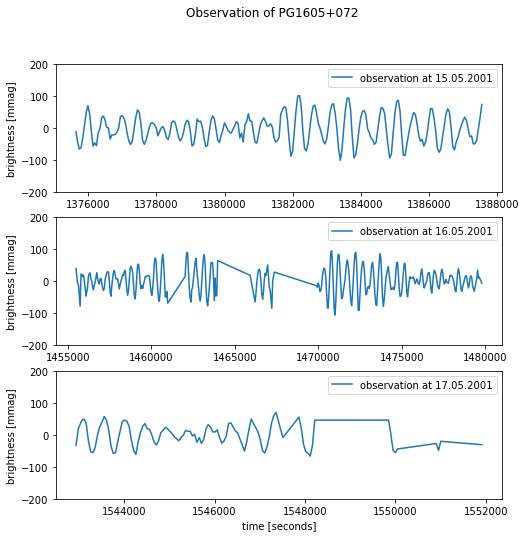

In [31]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# YOUR CODE HERE

#import and store the data into numpy arrays
file_1=open('data/pg1605_15.05.2001.dat','r')
data_1=np.genfromtxt(file_1)

file_2=open('data/pg1605_16.05.2001.dat','r')
data_2=np.genfromtxt(file_2)

file_3=open('data/pg1605_17.05.2001.dat','r')
data_3=np.genfromtxt(file_3)

#select the valid data
mask_1=(data_1[:,1]<=600) & (data_1[:,1]>=0)
data_1=data_1[mask_1]

#caluclate the length of each observation day to keep track of it
len_1=len(data_1)

mask_2=(data_2[:,1]<=600) & (data_2[:,1]>=0)
data_2=data_2[mask_2]

len_2=len(data_2)

mask_3=(data_3[:,1]<=600) & (data_3[:,1]>=0)
data_3=data_3[mask_3]

len_3=len(data_3)

#combine the three 2-d arrays to one
data=np.append(data_1,data_2,axis=0)
data=np.append(data,data_3,axis=0)

#normalization: calculate the mean and substract it from the second column of data
mean=np.mean(data,axis=0)[1]
data[:,1]=data[:,1]-mean

#split the data into two columns and store them separately
times=data[:,0]
values=data[:,1]

#create subplots with the same y-axis and define a figsize
fig,(ax_1,ax_2,ax_3)=plt.subplots(nrows=3,ncols=1,sharey=True,figsize=(8,8))

#first graph: plot the first day and create label
ax_1.plot(times[:len_1],values[:len_1],label='observation at 15.05.2001')

#first legend 
ax_1.legend(loc="upper right")

#set y-axis label and limits
ax_1.set_ylabel(r'brightness [mmag]')
ax_1.set_ylim(-200,200)

#second graph: plot the second day and create label
ax_2.plot(times[len_1:-len_3],values[len_1:-len_3],label='observation at 16.05.2001')
ax_2.legend(loc="upper right")

#set y-label. don't need to set y-lim a gain since they share y-axis
ax_2.set_ylabel(r'brightness [mmag]')

#third graph: plot the third day and create label
ax_3.plot(times[-len_3:],values[-len_3:],label='observation at 17.05.2001')
ax_3.legend(loc="upper right")

#set x-label only for the last graph
ax_3.set_xlabel(r'time [seconds]')

ax_3.set_ylabel(r'brightness [mmag]')

#add title on the top
fig.suptitle(r'Observation of PG1605+072')

plt.show()

## Lomb-Scargle periodograms

When you have a closer look at the periodical signal of PG1605+072 you see clearly more than one frequency. First analyses show that it is impossible to simply fit all individual frequencies at once. Even a simple fit will fail, as you will see in the further tasks. Usually a first try will be to analyze the values with a DTF as we introduced in the last exercise. However, as said, the values of the dataset do not have equal time differences, so we need a different approach. 

One solution is the Lomb-Scargle algorithm ([Scargle, 1982](http://articles.adsabs.harvard.edu/pdf/1982ApJ...263..835S)). This algorithm is a variation of the DFT, in which a time series is decomposed into a linear combination of sinusoidal functions. The basis of sinusoidal functions transforms the data from the time domain to the frequency domain. Scargle has derived a formula for transform coefficients that is similar to the DFT in the limit of evenly spaced observations. In addition, an adjustment of the values used to calculate the transform coefficients makes the transform invariant to time shifts. 

In practice the algorithm tests the time series for selected frequencies $\omega$ and return the power for this frequency similar to what you know from the DTF coefficients. For a set of frequencies we can create a periodogram with these formulas:


$$ P_{x}(\omega )={\frac  {1}{2}}\left({\frac  {\left[\sum _{j}X_{j}\cos \omega (t_{j}-\tau )\right]^{2}}{\sum _{j}\cos ^{2}\omega (t_{j}-\tau )}}+{\frac  {\left[\sum _{j}X_{j}\sin \omega (t_{j}-\tau )\right]^{2}}{\sum _{j}\sin ^{2}\omega (t_{j}-\tau )}}\right)$$

with:

$$ \tan {2\omega \tau }={\frac  {\sum _{j}\sin 2\omega t_{j}}{\sum _{j}\cos 2\omega t_{j}}}$$

As a side effect and mentioned in some realizations of this algorithms, you need to precisely define the grid of testing frequencies. If you choose a grid which has basically not small distance between the individual frequencies you may simply miss peaks of interests. In the DTF algorithm this cannot happen.


The following example demonstrate the algorithm:

In the following code block we create a 15 Hz signal, which is spread over 2 seconds and contains 5000 data values. Some noise is added on the values as well as on the time positions, so that the difference between 2 times are not constant anymore:

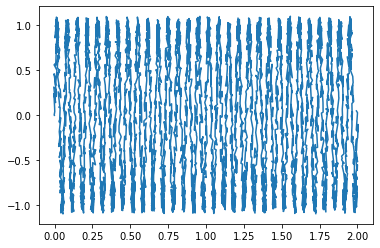

In [3]:
%matplotlib inline

import numpy as np
import numpy.random as nr

import matplotlib.pyplot as plt

freq = 15          # test frequency
samples = 5000     # nr of samples
sample_time = 2    # sample_length

# create some uniform noise for x and y values
x_noise = nr.uniform(-0.1,0.1,samples)/10
y_noise = nr.uniform(-0.1,0.1,samples)

# calculate the signal
x = np.linspace(0,2*np.pi*freq*sample_time, samples)
y = np.sin(x)+y_noise

# calculate the times and put some noise on the values
t = np.linspace(0, sample_time, x.shape[0])+x_noise

# plot the demonstration signal
plt.plot(t, y)


This figure show clearly the 15Hz signal, which is not so clear as we had it for the audio signals. The next code cell will apply the Lomb-Scargle algorithm on the defined data. The algorithm is defined in the *astropy.timeseries* module.

number of frequencies: (25001,)


(0, 20)

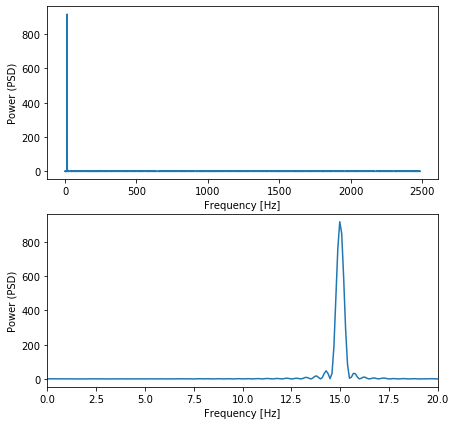

In [4]:
from astropy.timeseries import LombScargle

# use the lomb_scargle algorithm for analysis, use no normalisations PSD
# and limits the number of frequencies up to the nyquist_factor=2 -> half of
# the number of samples, according to the frequency range of the DTF!

frequency, power = LombScargle(t, y, normalization='psd').autopower(nyquist_factor=2)

print(f'number of frequencies: {frequency.shape}')

plt.figure(figsize=(7,7))
plt.subplot(211)
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Power (PSD)')
plt.plot(frequency, power)

plt.subplot(212)
plt.xlabel(r'Frequency [Hz]')
plt.ylabel(r'Power (PSD)')
plt.plot(frequency, power)
plt.xlim((0,20))

Using the *LombScargle* function takes two arguments, the times in seconds and the according array with the values. The result is then used with the *autopower* function and gives two arrays back, the *frequencies* and the *power*. The arguments for *autopower* controls the shape of the output. In contrast to the results of the DTF, the Lomb-Scargle algorithm can test more frequencies and with the argument *nyquist_factor=2* the returned frquency range is similar to the DTF. For our test signal we can plot the frequency range similar to the DTF (upper figure) and can zoom in into the important region (lower figure) which shows us clearly a peak at 15Hz, which was the basis in our test signal.

## Task 2: Periodogramm (10 Points)

**Your task**:

Analyze the PG1605+072 data set with the Lomb-Scargle algorithm and plot the frequencies between 1.6 and 3.0 mHz (Milliherz) and extract the main 5 frequencies which have the most power in a python list named *main_freq*. The limitation of the frequencies is due to some prior research. 

For the extraction of a main frequency you can follow this recipe:
 * define a frequency left of the maximum and another right of the maximum __by eye__ such that you have only one maximum in this subpart of the array
 * use *np.argmin* to get the index of the maximum 
 * the according index in the frequency array will give you the frequency we want to have
 * you can put all these commands into a function *max_from_subarray* which takes the frequencies and the power array as an argument as well as the start and end frequency for the maximum search and returns the frequency of the maximum 


**Hints**:
 * the frequencies are returned in Hz, so you should transform these into mHz

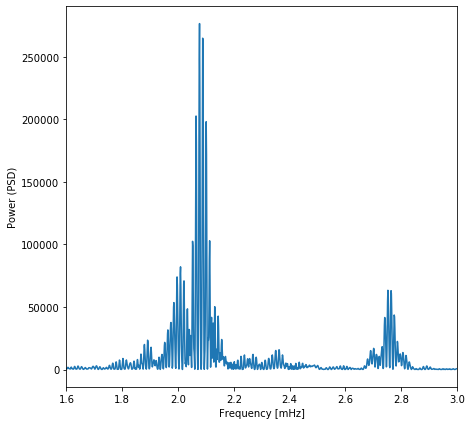

[2.076982231618408, 2.0089030544006508, 2.752100739027833, 1.890899147223205, 2.3617801229793587]


In [33]:
%matplotlib inline
from astropy.timeseries import LombScargle

# YOUR CODE HERE

#perform Lomb_scargle algorithm and fix the number of frequency to half of the samples
frequency, power = LombScargle(times, values, normalization='psd').autopower(nyquist_factor=2)

#change the unit from Hz to mHz
frequency=frequency*1000

#create a figure
plt.figure(figsize=(7,7))

#set x and y labels
plt.xlabel(r'Frequency [mHz]')
plt.ylabel(r'Power (PSD)')

#plot the spectrum
plt.plot(frequency, power)

#set x limit to 1.6 to 3.0 mHz
plt.xlim(1.6,3.0)

plt.show()

#define a function that takes the frequency and power arrays, as well as start and end frequencies, and produces the maximum frequency
def max_from_subarray(frequency,power,start,end):
    
    #create a mask that select only the frequencies between start and end
    mask=(frequency>start) & (frequency<end)
    
    #find the index of the first True
    start_ind=np.where(mask==True)[0][0]
    
    #calculate the index of the maximum power
    max_ind=start_ind+np.argmax(power[mask])
    
    #find the frequency corresponding to that maximum power
    freq=frequency[max_ind]
    
    return freq

#create an empty list
main_freq=[]

#first frequency
freq=max_from_subarray(frequency,power,2.05,2.15)
main_freq.append(freq)

#second frequency
freq=max_from_subarray(frequency,power,1.95,2.02)
main_freq.append(freq)

#third
freq=max_from_subarray(frequency,power,2.6,3.0)
main_freq.append(freq)

#fourth
freq=max_from_subarray(frequency,power,1.8,1.92)
main_freq.append(freq)

#fifth
freq=max_from_subarray(frequency,power,2.3,2.4)
main_freq.append(freq)

#print out the five main frequencies
print(main_freq)

## Frequency fitting

The next step in the data analysis is the fit of the individual sinusoidal signals of the light curve. Therefor we want to use the *curve_fit* function of the *scipy.optimize* module. 

The sine function can be defined with this:

$$ f(x) = a \sin(x*b+c)+d $$

where $a$ is the amplitude, $b$ the frequency of the signal and $c$ the phase of the signal, which is not so important for the data analysis and the offset $d$. As we already know the frequencies from the Lomb-Scargle analysis, we can simply use these values for $b$.

## Task 3: Single fit (20 Points)

**Your tasks**:

Fit the most powerful frequency of the Lomb-Scargle analysis to the data of the first night (not to the whole dataset!). You can use *curve_fit* as introduced in the lecture and plot and discuss the results.

**Hints**:

 * replace the $b$ of the fit function with the known frequency and fit the parameters $a$, $c$ and $d$
 * the fit should be done with a frequency in Hz not in mHz!
 * calculate the errors from the covariance matrix

fitted parameters: a=-42.49045456287368, c=43.64427751175845, d=-2.851499891326505
errors are 0.09110963689550661, 0.0021617733641025646 and 0.06468738881635272 respectively


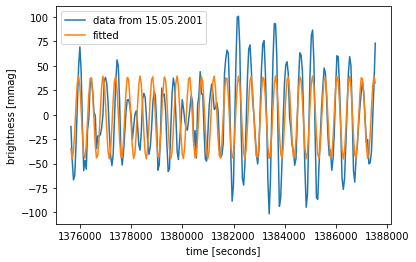

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt

import scipy.optimize as so

# YOUR CODE HERE

#define the fitting function with the first frequency
def func(x,a,c,d):
    return a*np.sin(2*np.pi*x*main_freq[0]/1000.+c)+d

#extract the first day observation
times_1=times[:len_1]
values_1=values[:len_1]

#fit the first day data
popt,pcov=so.curve_fit(func,times_1,values_1,absolute_sigma=True)

#print the fitted parameters a, c and d
print('fitted parameters: a={}, c={}, d={}'.format(*popt))

#calculate and print errors
error=np.sqrt(np.diag(pcov))
print('errors are {}, {} and {} respectively'.format(*error))

#plot data
plt.plot(times_1,values_1,label='data from 15.05.2001')

#plot fitted function
x=np.linspace(min(times_1),max(times_1),len_1)
plt.plot(x,func(x,*popt),label='fitted')

#show legend
plt.legend()

#set x and y labels
plt.xlabel('time [seconds]')
plt.ylabel('brightness [mmag]')

plt.show()

Of course the first fit is a disaster as you can see in the plot. However we have in total 5 main frequencies but fitting a function with these frequencies individually will fail as well.

One solution is to fit all 5 frequencies at the same time.

## Task 4: Multifit (20 Points)

**Your tasks**:

Fit all the frequency of the Lomb-Scargle analysis to the complete data set simultaneous. Use again *curve_fit* function for the fitting. Show your results in a similar plot as in Task 1. Please discuss the results.

**Hints**:
 * you can create a fit-function with 11 parameters as a sum of 5 sinus functions (two parameters for each sinusoidal frequency and only one offset (why?))
 * the fit should be done with a frequency in Hz not in mHz!
 * calculate the errors from the covariance matrix
 * for the discussion only the amplitudes are of interest

## Why
Five offsets can be combined into one because they are added together.

fitted parameters: a_1=34.49924270897711, c_1=21.54126900654016, a_2=-13.763245946258222, c_2=-4.699912625615293, a_3=18.351863487450746, c_3=9.047873884762076, a_4=-9.384622182838571, c_4=6.4628442213269635, a_5=-5.590511020449253, c_5=1.191163627448905, d=0.44688086398851384
errors are 0.055913893917483526, 0.0016127682814672743, 0.05583518589864191, 0.0040286730655356125, 0.053366282754656255, 0.002909192278914663, 0.05348748230686776, 0.005751615359239209, 0.05351443047809082, 0.00962731180209253 and 0.03770197258282431 respectively


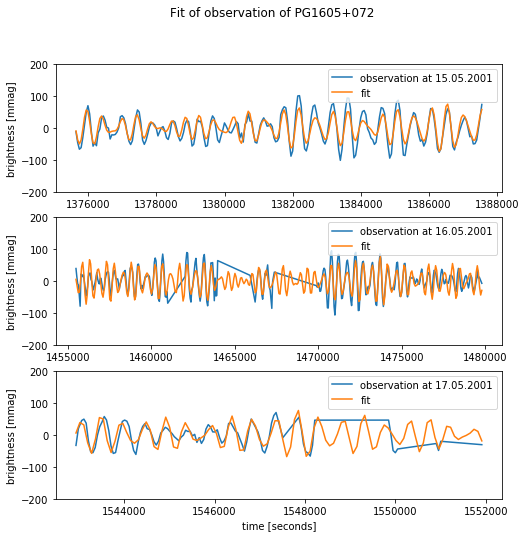

In [51]:
%matplotlib inline

import matplotlib.pyplot as plt

import scipy.optimize as so

# YOUR CODE HERE

#define the fitting function using all 5 frequencies
def func_sum(x,a_1,c_1,a_2,c_2,a_3,c_3,a_4,c_4,a_5,c_5,d):
    return a_1*np.sin(2*np.pi*x*main_freq[0]/1000.+c_1)+a_2*np.sin(2*np.pi*x*main_freq[1]/1000.+c_2)+a_3*np.sin(2*np.pi*x*main_freq[2]/1000.+c_3)+a_4*np.sin(2*np.pi*x*main_freq[3]/1000.+c_4)+a_5*np.sin(2*np.pi*x*main_freq[4]/1000.+c_5)+d

#fit the whole data
popt,pcov=so.curve_fit(func_sum,times,values,absolute_sigma=True)

#print the fitted parameters 
print('fitted parameters: a_1={}, c_1={}, a_2={}, c_2={}, a_3={}, c_3={}, a_4={}, c_4={}, a_5={}, c_5={}, d={}'.format(*popt))

#calculate and print errors
error=np.sqrt(np.diag(pcov))
print('errors are {}, {}, {}, {}, {}, {}, {}, {}, {}, {} and {} respectively'.format(*error))

#create subplots with the same y-axis and define a figsize
fig,(ax_1,ax_2,ax_3)=plt.subplots(nrows=3,ncols=1,sharey=True,figsize=(8,8))

#first graph: plot the first day and create label
ax_1.plot(times[:len_1],values[:len_1],label='observation at 15.05.2001')

#plot the fit
x=np.linspace(min(times[:len_1]),max(times[:len_1]),len_1)
ax_1.plot(x,func_sum(x,*popt),label='fit')

#first legend 
ax_1.legend(loc="upper right")

#set y-axis label and limits
ax_1.set_ylabel(r'brightness [mmag]')
ax_1.set_ylim(-200,200)

#second graph: plot the second day and create label
ax_2.plot(times[len_1:-len_3],values[len_1:-len_3],label='observation at 16.05.2001')

#plot the fit
x=np.linspace(min(times[len_1:-len_3]),max(times[len_1:-len_3]),len_2)
ax_2.plot(x,func_sum(x,*popt),label='fit')

ax_2.legend(loc="upper right")

#set y-label. don't need to set y-lim a gain since they share y-axis
ax_2.set_ylabel(r'brightness [mmag]')

#third graph: plot the third day and create label
ax_3.plot(times[-len_3:],values[-len_3:],label='observation at 17.05.2001')

#plot the fit
x=np.linspace(min(times[-len_3:]),max(times[-len_3:]),len_3)
ax_3.plot(x,func_sum(x,*popt),label='fit')

ax_3.legend(loc="upper right")

#set x-label only for the last graph
ax_3.set_xlabel(r'time [seconds]')

ax_3.set_ylabel(r'brightness [mmag]')

#add title on the top
fig.suptitle(r'Fit of observation of PG1605+072')

plt.show()


## Discussion
Absolute values of the amplitudes of the first five frequencies are 34.5, 13.8, 18.3, 9.4 and 5.6. Since frequencies are ranked from the largest power to the amallest, the amplitudes should as well. But there is a reverse of order between the second and the third frequencies. Looking at the spectrum, we see that the powers of the second and the third ar similar, so the order reverse is reasonable. 

# Epilogue

This exercise contains real data from Oliver Cordes PHD project, which topic was a multi-CCD camera BUSCA build in the AIfA for the Calar Alto Observatory in Spain. 

The observation of PG1605+072 was one of the challenging projects for this camera. As said from prior research the main frequencies of this star were known, but the real problem was the proper sampling of the data. In 2001 we were only be able to observe a single image of this star every 2.5 minutes. The most time were not the exposure time, but the readout time of the CCD. We were able to reduce the total time up to 45 seconds, while just reading out a smaller CCD part. If you translate the frequencies into full periods, you will see that for the fastest frequency ~2.76 mHz you will have a period of 370 seconds. So, we had only around 8 data values for a whole period. For a full period you will need as least 5 values, so we were really near this limit. This is one explanation for the errors in the data analysis. In later years BUSCA was optimized in such a way, that we can do an observation every 10 seconds. Unfortunately we don't have some useful data for this star available, because of bad weather and other problems.

The publication in which this dataset of this exercise was used can be found at:

Falter S., Heber U., Dreizler S., Schuh S.L., Cordes O., Edelmann H., 2003, A\&A 401, 289